INTENTION: <br>
To assist in selection of model to fit to data and which features to combine.

In [71]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
#loading data as data frame
df = pd.read_csv("powerlifting.csv")

#getting rid of irrelevant freatures ('playerId' and 'Name')
df = df.iloc[:, 2: ]
df.head()

,Sex,Equipment,Age,BodyweightKg,BestSquatKg,BestDeadliftKg,BestBenchKg
0,M,Raw,23.0,87.30,205,235.0,125.0
1,M,Wraps,23.0,73.48,220,260.0,157.5
2,M,Raw,26.0,112.40,142.5,220.0,145.0
3,F,Raw,35.0,59.42,95,102.5,60.0
4,F,Raw,26.5,61.40,105,127.5,60.0


In [10]:
#encoding data ('Sex' and 'Equipment')
from sklearn.preprocessing import OrdinalEncoder

columns_to_encode = ['Sex', 'Equipment']
encoder = OrdinalEncoder(
    categories = [['F', 'M'],
    ['Raw', 'Wraps', 'Single-ply', 'Multi-ply']]
)


df[columns_to_encode] = encoder.fit_transform(df[columns_to_encode])

In [ ]:
#fixing non-float inputs / incorect format 
import numpy as np
def fixing_format(column):
    for index, row_value in df[column].items():
        try:
            df.loc[index, column] = np.abs(float(row_value))
        except (TypeError, ValueError):
            df.loc[index, column] = np.nan
    return df
fixing_format('BodyweightKg')
fixing_format('BestSquatKg')
fixing_format('BestDeadliftKg')
fixing_format('BestBenchKg')

df.dropna(inplace=True)

np.abs() was added after veiwing the plot and seeing negative scale on the x axis. <br> 
Some of the data had '-' before the value.

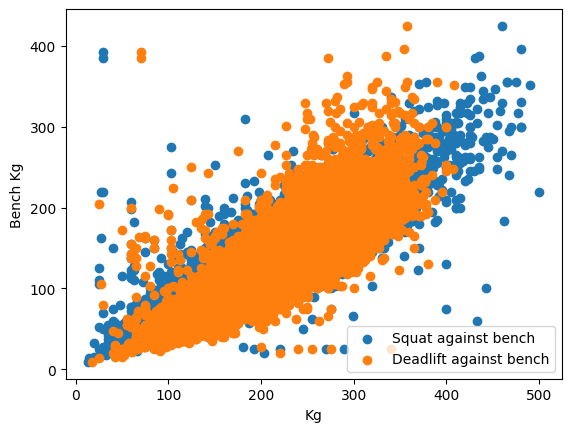

In [14]:
#first plot will be best squat against best bench
#second plot will be best deadlift against best bench
import numpy as np

squat, deadlift, bench = df.iloc[:, 4], df.iloc[:, 5], df.iloc[:,6]

plt.scatter(squat, bench, label = 'Squat against bench')
plt.scatter(deadlift, bench, label = 'Deadlift against bench')
plt.xlabel('Kg')
plt.ylabel('Bench Kg')
plt.legend()
plt.show()


Clearly there are some outliers; perhaps due to chest or leg inguries. <br> 
These need to be removed.

408.23


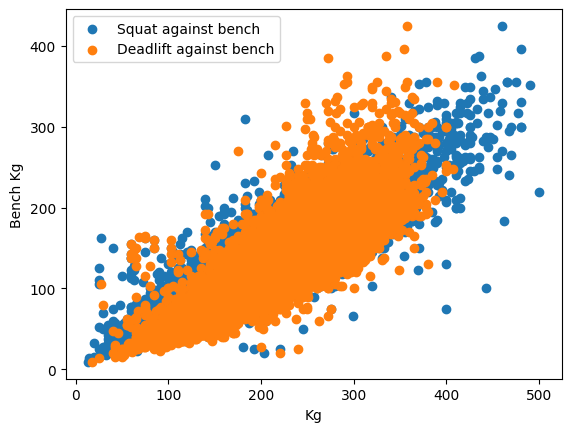

In [ ]:
#setting a standard for removing outliers 
squat_upper_lim, squat_lower_lim = np.mean(squat) + (np.std(squat)), np.mean(squat) - (np.std(squat))
deadlift_upper_lim, deadlift_lower_lim = np.mean(deadlift) + (np.std(deadlift)), np.mean(deadlift) - (np.std(deadlift))
bench_upper_lim, bench_lower_lim = np.mean(bench) + (np.std(bench)), np.mean(bench) - (np.std(bench))

#removing outliers using bitwise boolean indexing
df.drop(df[(df['BestBenchKg'] >= bench_upper_lim) & (df['BestSquatKg'] <= squat_lower_lim)].index, inplace = True)
df.drop(df[(df['BestBenchKg'] <= bench_lower_lim) & (df['BestSquatKg'] >= squat_upper_lim)].index, inplace = True)
df.drop(df[(df['BestBenchKg'] >= bench_upper_lim) & (df['BestDeadliftKg'] <= deadlift_lower_lim)].index, inplace = True)
df.drop(df[(df['BestBenchKg'] <= bench_lower_lim) & (df['BestDeadliftKg'] >= deadlift_upper_lim)].index, inplace = True)

#plotting again without outliers
squat, deadlift, bench = df.iloc[:, 4], df.iloc[:, 5], df.iloc[:,6]

plt.scatter(squat, bench, label = 'Squat against bench')
plt.scatter(deadlift, bench, label = 'Deadlift against bench')
plt.xlabel('Kg')
plt.ylabel('Bench Kg')
plt.legend()
plt.show()


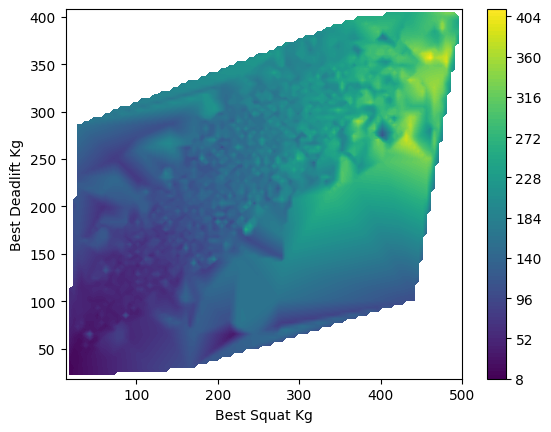

In [31]:
#The next plot will be bench against squat agsinst deadlift
from scipy.interpolate import griddata

S = np.linspace(squat.min(), squat.max(), 100)
D = np.linspace(deadlift.min(), deadlift.max(), 100)
S_grid, D_grid = np.meshgrid(S, D)
B_grid = griddata((squat, deadlift), bench, (S_grid, D_grid), method='linear')

plt.contourf(S_grid, D_grid, B_grid, levels=100)
plt.colorbar()
plt.xlabel('Best Squat Kg')
plt.ylabel('Best Deadlift Kg')
plt.show()

The peak is located as the bright yellow dot in the top right. <br>
It is clear this matches with the squat and deadlift for the max bench from the previous plot.
These plots show that squat, deadlift and bench have linear correlation.

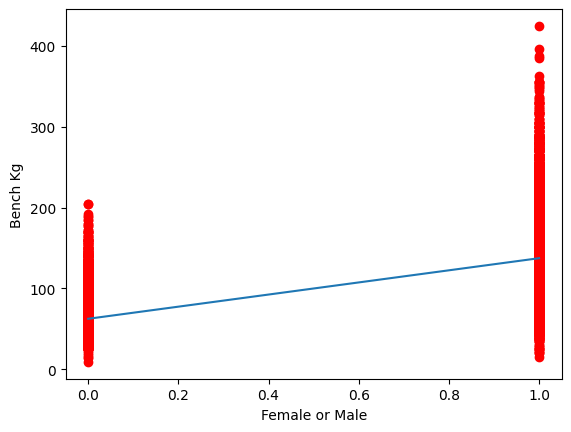

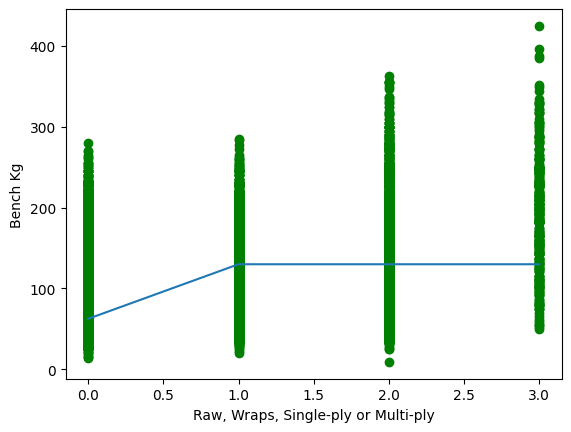

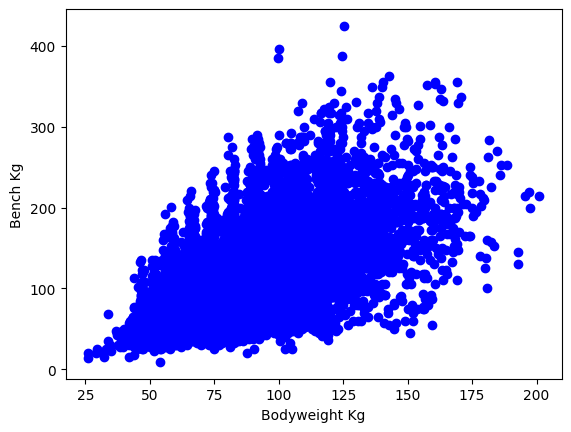

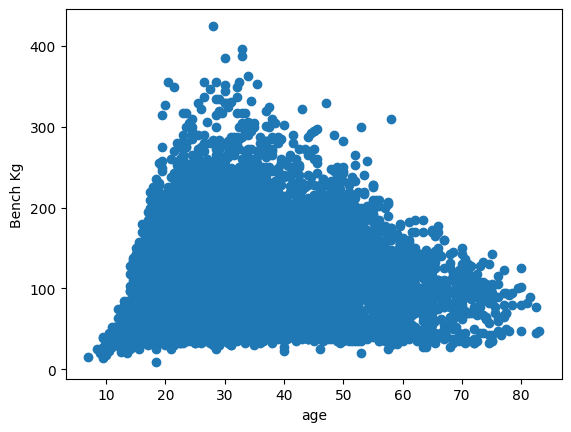

In [ ]:
#The final plots will be bench against; sex, equipment, bodyweight and age 
df_ASE = df.iloc[:, 0:4]

#Since the affect is being compared the data will first be scaled
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(new_df)
sex, equipment, age, bw = df_ASE.iloc[:, 0], df_ASE.iloc[:, 1], df_ASE.iloc[:,2], df_ASE.iloc[:,3]

#for the encoded data, a line will be drawn through the median of each vertical line to check for linarity and y-intercepts

#sex
F = (df[df['Sex'] == 0].iloc[:, 6])
M = df[df['Sex'] == 1].iloc[:, 6]
F_med, M_med = float(np.median(F)) , float(np.median(M))
meds = [F_med, M_med]
plt.plot([0,1], meds)
plt.scatter(sex, bench, c='r')
plt.xlabel('Female or Male')
plt.ylabel('Bench Kg')
plt.show()

#equipment
R = df[df['Equipment'] == 0].iloc[:, 6]
W = df[df['Equipment'] == 1].iloc[:, 6]
S = df[df['Equipment'] == 1].iloc[:, 6]
M = df[df['Equipment'] == 1].iloc[:, 6]
R_med, W_med, S_med, M_med = float(np.median(F)) , float(np.median(W)), float(np.median(S)), float(np.median(M))
meds = [R_med, W_med, S_med, M_med]
plt.plot([0,1,2,3], meds)
plt.scatter(equipment, bench, c='g')
plt.ylabel('Bench Kg')
plt.xlabel('Raw, Wraps, Single-ply or Multi-ply')
plt.show()

#bodyweight
plt.scatter(bw, bench, c='b')
plt.xlabel('Bodyweight Kg')
plt.ylabel('Bench Kg')
plt.show()

#age
plt.scatter(age, bench)
plt.xlabel('Age')
plt.ylabel('Bench Kg')
plt.show()

Sex against bench suggests linearity with a y-intercept. <br>
Equipment aginst bench suggests non-linearity as does age against bench.

CONCLUSIONS: <br>
-  Bench showed linear correlation with both squat and deadlift so a model will be fitted using both features and a Linear Regression model.
-  Most outliers were removed however, due to the nature of powerlifting, there were some extreme cases therefore KNeighborsRegressor will be used.
-  Sex and bench showed a linear correlation so will be added into deatures for another Linear Regression model.
-  Equipment showed very little linearity so when added to features, a KNN Regression will be used.
-  Bodyweight shows very weak linear correlation so will be used with a Random Foresr.
-  Age showed no correlation so a Radnom Forest Regressor will be used.